In [30]:
import numpy as np
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Loading dataset, visualization of correlationMatrix

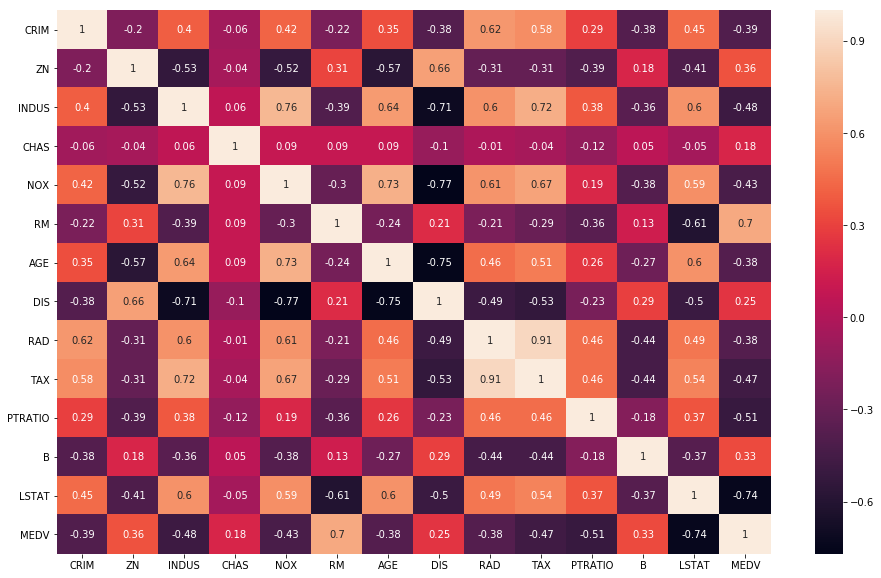

In [165]:
dataset = load_boston()

boston = pd.DataFrame(dataset.data, columns = dataset.feature_names)
boston.head()

boston['MEDV'] = dataset.target

correleationMatrix = boston.corr().round(2)
plt.figure(figsize = (16,10))
sns.heatmap(correleationMatrix, annot=True)

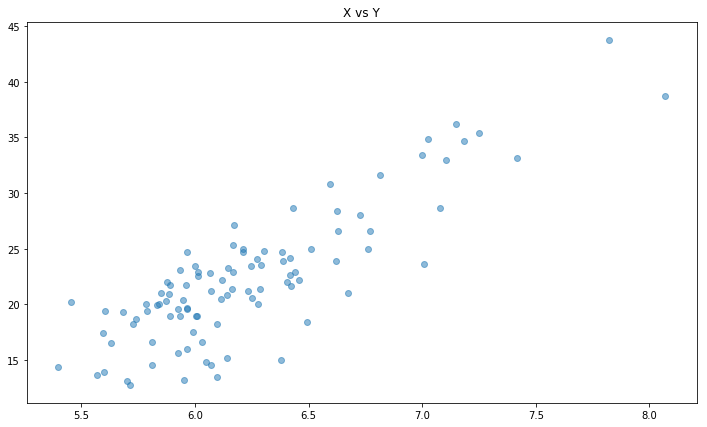

In [237]:
X = boston['RM']
y = boston['MEDV']

X = X[1:100]
y = y[1:100]
plt.figure(figsize=(12,7))
plt.title('X vs Y')
plt.scatter(X,y, alpha=0.5)
plt.show()

### Linear Regression Using Sklearn

In [347]:
X = boston['RM']
y = boston['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [348]:
lm = LinearRegression()
X_train = np.array(X_train).reshape(-1, 1)
y_train= np.array(y_train).reshape(-1, 1)
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

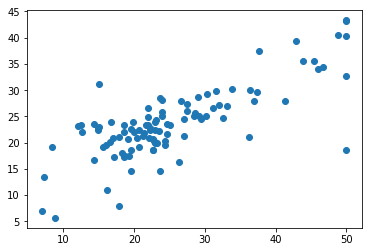

In [349]:
X_test = np.array(X_test).reshape(-1, 1)

prediction = lm.predict(X_test)
plt.scatter(y_test, prediction)

In [350]:
print('MSE', mean_squared_error(y_test, prediction))

MSE 45.60193447530386


### Class Implementation of LinearRegressionGD

In [483]:
class LinearRegressionGradientDescent():
    def __init__ (self, b0, b1):
        self.b0 = b0
        self.b1 = b1
        
    def fit(self, X, y, lr = 0.0001, n_times = 1000):
        error = []
        n = len(y)
        for i in range(n_times):
            y_pred = (self.b0 + X*self.b1)
            cost = (y - y_pred)
            partial_b0 = (-2/n) * (cost)
            partial_b1 = (-2/n * X) * (cost)
            self.b0 = self.b0 - lr * partial_b0.sum()
            self.b1 = self.b1 - lr * partial_b1.sum()
            error.append(mean_squared_error(y, y_pred))
        
        return (error, self.b0, self.b1)
    
    def predict(self, x_i):
        return self.b0 + self.b1 * x_i 
        

In [484]:
dataset = load_boston()

boston = pd.DataFrame(dataset.data, columns = dataset.feature_names)
boston.head()

boston['MEDV'] = dataset.target

X = boston['RM']
y = boston['MEDV']

lm = LinearRegressionGradientDescent(b0=0, b1=1)
errorList, b0, b1 = lm.fit(X, y)
print(len(errorList))

1000


### Plotting the errorlist to make sure we get to convergence

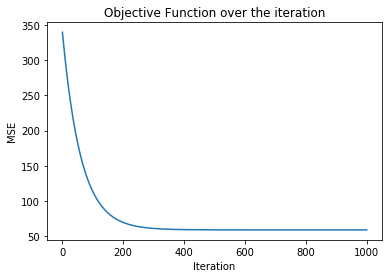

Last MSE calculation is  20.50976270611956


In [485]:
plt.title("Objective Function over the iteration")
plt.plot(np.arange(1, len(errorList)+ 1) , errorList)
plt.xlabel("Iteration")
plt.ylabel("MSE");
plt.show()
print('Last MSE calculation is ', error[-1])



### Prediction Line

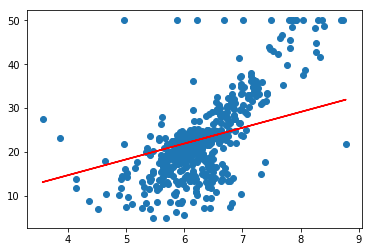

In [486]:
X = np.array(X).reshape(-1, 1)
y_pred = lm.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color = 'r')
plt.show()

In [ ]:
dataset = load_boston()

boston = pd.DataFrame(dataset.data, columns = dataset.feature_names)
boston.head()

boston['MEDV'] = dataset.target

X = boston['RM']
y = boston['MEDV']

X = X[0:100]
y = y[0:100]
cost = b0 = 0
b1 = 1
error = []
lr = 0.00001
for i in range(100):
    y_pred = (b0 + b1*X)
    cost = (y - y_pred)**2
    partial_b0 = -2 * (y - (b0 + b1 * X))
    partial_b1 = (-2 * X) * (y - (b0 + b1 * X))
    b0 = b0 - lr * partial_b0.sum()
    b1 = b1 - lr * partial_b1.sum()
    error.append(mean_squared_error(y, y_pred))
error[-1]